In [63]:
import pandas as pd
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import import_ipynb
from UtilDataframes import cvtTimestampIntoDatetimeIndex

,Unnamed: 0,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,24096863,1631582460,1,1069.0,45287.741429,45314.95,45268.40,45298.868508,36.800881,45291.343025,-0.000032
1,24096877,1631582520,1,2577.0,45302.568571,45371.46,45294.02,45348.035714,69.452843,45323.250853,0.000480
2,24096891,1631582580,1,1471.0,45349.388571,45374.48,45311.00,45333.891429,43.836552,45348.666794,0.001613
3,24096905,1631582640,1,1480.0,45321.851693,45355.37,45251.30,45277.501429,44.815200,45294.024285,0.001632
4,24096919,1631582700,1,1101.0,45278.460234,45313.59,45249.02,45269.988333,32.039459,45283.350543,0.001293


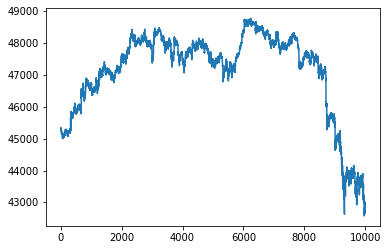

In [47]:
data = pd.read_csv('../data/Market/btc.csv')
data['Close'].plot()
data.head()

In [48]:
btc = data[['timestamp', 'Close']].copy()
btc.dropna(inplace=True)

**Convertimos la columna de timestamps a datetimes y la ponemos como index**

In [56]:
cvtTimestampIntoDatetimeIndex(btc, 'timestamp')
btc

,Close
timestamp,
2021-09-14 03:21:00,45298.868508
2021-09-14 03:22:00,45348.035714
2021-09-14 03:23:00,45333.891429
2021-09-14 03:24:00,45277.501429
2021-09-14 03:25:00,45269.988333
...,...
2021-09-21 01:56:00,42899.012857
2021-09-21 01:57:00,42860.005714
2021-09-21 01:58:00,42827.020000


**Inferimos la frecuencia de los datos, sirve para rellenar algún hueco en el registro de las fechas, por ejemplo que se salte el registro de un minuto de una hora en concreto de un día**

In [50]:
btc = btc.asfreq(pd.infer_freq(btc.index))
btc.head()

,Close
timestamp,
2021-09-14 03:21:00,45298.868508
2021-09-14 03:22:00,45348.035714
2021-09-14 03:23:00,45333.891429
2021-09-14 03:24:00,45277.501429
2021-09-14 03:25:00,45269.988333


**Ahora vamos a ploter la correlación parcial de 100 lags, es decir, la correlación de cada momento t, con los 100 anteriores, uno por uno**

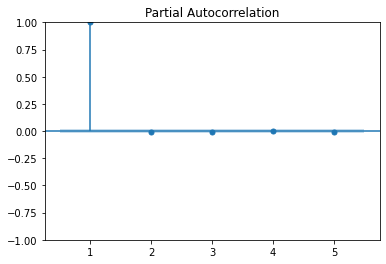

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(btc, lags=5, method='ywm', zero=False); # Se pone el punto y coma para que no se plotee dos veces, son cosas de ipy notebooks

**Parece que hay una correlación fuerte con el período anterior, es decir, de cada periodo t, con t - 1**

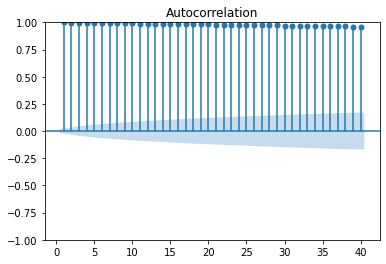

In [55]:
plot_acf(btc, zero=False);

**Parece ser que hay una correlación fuerte con los períodos anteriores**

**Vamos a crear ahora los conjuntos de entrenamiento y de testeo**

In [71]:
train_end_date = datetime(2021, 9, 19)
test_start_date = train_end_date + timedelta(seconds=60)
train_data = btc[:train_end_date]
test_data = btc[test_start_date:]
test_data

,Close
timestamp,
2021-09-19 00:01:00,47869.474286
2021-09-19 00:02:00,47887.411045
2021-09-19 00:03:00,47901.317143
2021-09-19 00:04:00,47940.975714
2021-09-19 00:05:00,47942.065714
...,...
2021-09-21 01:56:00,42899.012857
2021-09-21 01:57:00,42860.005714
2021-09-21 01:58:00,42827.020000
